# Results for MNIST experiments

These plots were obtained using results from running `mnist_experiments.py`

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
colors = sns.color_palette('Blues_r')

## Investigating the effects of dataset size

In [2]:
with open('./mnist_results.pkl', 'rb') as f:
    results = pickle.load(f)

In [3]:
data_fraction = [0.05, 0.1, 0.15, 0.25, 0.5, 0.75, 1]

### Replication: Plot dropout as function of hidden layer

In [4]:
# for each data fraction value, for each of 3 models, get the dropout parameter
best_ps = np.array([[r[1] for r in result] for result in results])

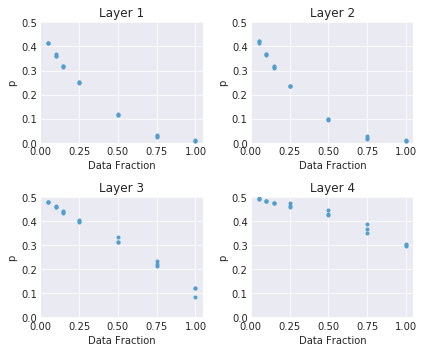

In [5]:
f, axes = plt.subplots(2, 2, figsize=(6, 5))
for ii in range(2):
    for jj in range(2):
        layer = ii * 2 + jj
        axes[ii, jj].plot(data_fraction, best_ps[:, :, layer], '.', color=colors[2])
        axes[ii, jj].set_title('Layer {}'.format(layer+1))  
        axes[ii, jj].set_ylim([0, 0.5])
        axes[ii, jj].set_ylabel('p')
        axes[ii, jj].set_xlabel('Data Fraction')
f.tight_layout()
f.savefig('mnist_data_frac.png')

## Hidden layer effects on dropout

In [6]:
dims = [64, 128, 256, 512, 1024, 2048]

In [7]:
with open('./mnist_results_dimension.pkl', 'rb') as f:
    results = pickle.load(f)

In [8]:
best_ps = np.array([[r[1] for r in result] for result in results])

In [9]:
best_ps.shape

(6, 3, 4)

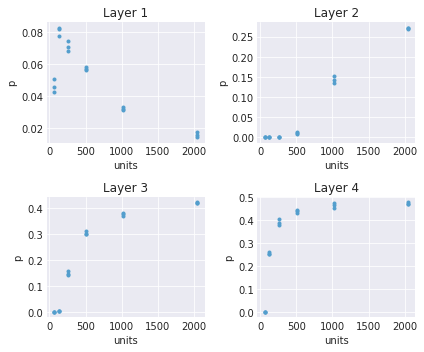

In [10]:
f, axes = plt.subplots(2, 2, figsize=(6, 5))
for ii in range(2):
    for jj in range(2):
        layer = ii * 2 + jj
        axes[ii, jj].plot(dims, best_ps[:, :, layer], '.', color=colors[2])
        axes[ii, jj].set_title('Layer {}'.format(layer+1)) 
        axes[ii, jj].set_ylabel('p')
        axes[ii, jj].set_xlabel('units')
        #axes[ii, jj].set_ylim([-0.1, 0.5])
f.tight_layout()
f.savefig('mnist_hidden_dim.png')